In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

## **I] Récupération et cleaning du dataset**

### **1) On récupère le dataset**

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


In [4]:
for year in range(2000, 2016): print(year, ':', df[df['Year']==year].isna().sum().sum())

2000 : 204
2001 : 193
2002 : 173
2003 : 154
2004 : 146
2005 : 138
2006 : 131
2007 : 123
2008 : 119
2009 : 116
2010 : 114
2011 : 110
2012 : 112
2013 : 159
2014 : 108
2015 : 463


In [5]:
df_2011 = df[df['Year']==2011]
df_2011.shape

(183, 22)

### **2) On regarde le nombre de valeurs manquantes**

In [6]:
pd.DataFrame(df_2011.count()/df_2011.shape[0]*100).rename(columns={0 : 'Taux de remplissage (%)'})

,Taux de remplissage (%)
Country,100.000000
Year,100.000000
Status,100.000000
Life expectancy,100.000000
Adult Mortality,100.000000
infant deaths,100.000000
Alcohol,99.453552
percentage expenditure,100.000000
Hepatitis B,92.896175
Measles,100.000000


In [7]:
df_2011 = pd.get_dummies(df_2011.drop(columns=['Country','Population','Year']).dropna().rename(columns={'Life expectancy ' : 'life_expectancy'})).drop(columns='Status_Developing')
df_2011.shape

(144, 19)

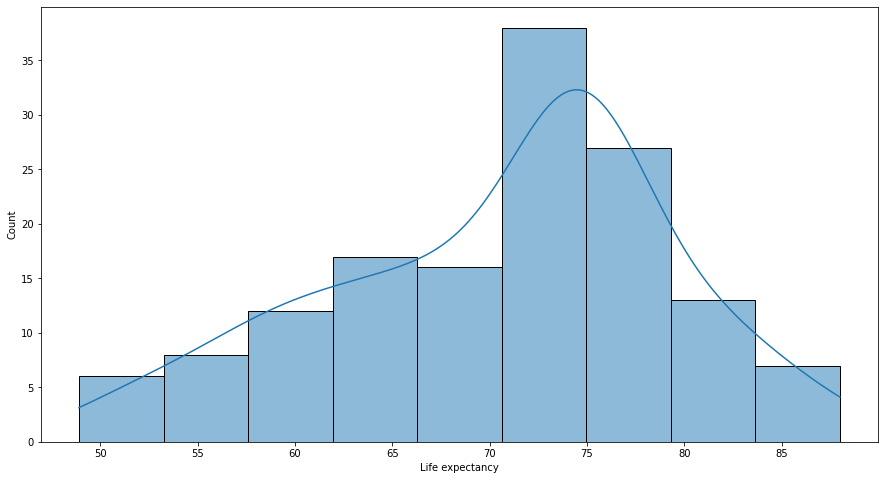

In [8]:
plt.figure(figsize=(15,8))
sns.histplot(df_2011['life_expectancy'], kde=True)
plt.xlabel('Life expectancy')
plt.show()

## **II] Préparation de df_clean en vue de l'application d'une régression linéaire**

### **1) Traçons la heatmap pour les colonnes numériques**

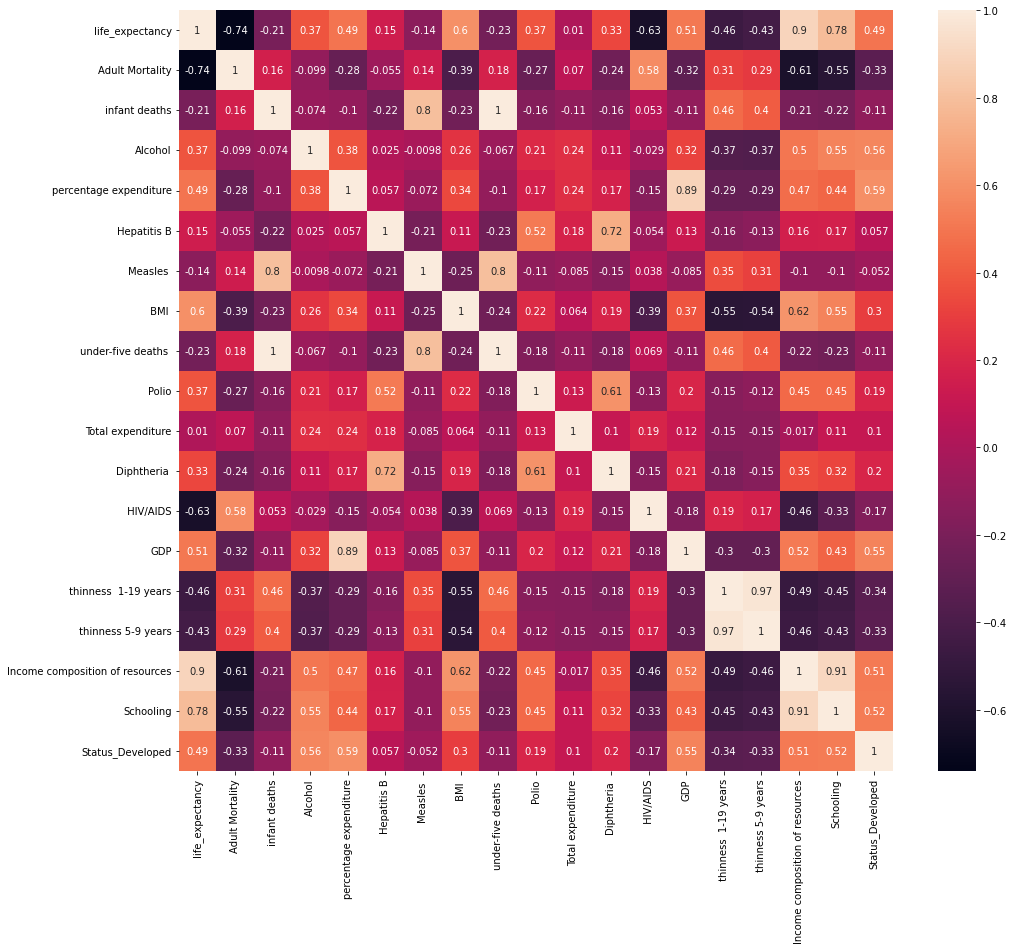

In [9]:
corr = df_2011.corr()

plt.figure(figsize=(16,14))
sns.heatmap(corr, annot=True)
plt.show()

### **2) On prépare les données en vue d'appliquer un modèle linéaire**

#### On sépare le dataset en deux partie : une pour entrainer notre modèle, l'autre pour le tester.

In [10]:
y = df_2011['life_expectancy']
X = df_2011.drop(columns='life_expectancy')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### On scale les colonnes numériques de notre dataset

In [12]:
scaler = MinMaxScaler()

def valeurs_numeriques(X_train, X_test):
    scaler.fit(X_train)
    return pd.DataFrame(scaler.transform(X_test))

In [13]:
X_train_prep = valeurs_numeriques(X_train, X_train)
X_test_prep = valeurs_numeriques(X_train, X_test)

## III] Application du modèle linéaire

In [14]:
lr = LinearRegression()
lr.fit(X_train_prep, y_train)

LinearRegression()

In [15]:
lr.score(X_test_prep, y_test)

0.8804842649818051

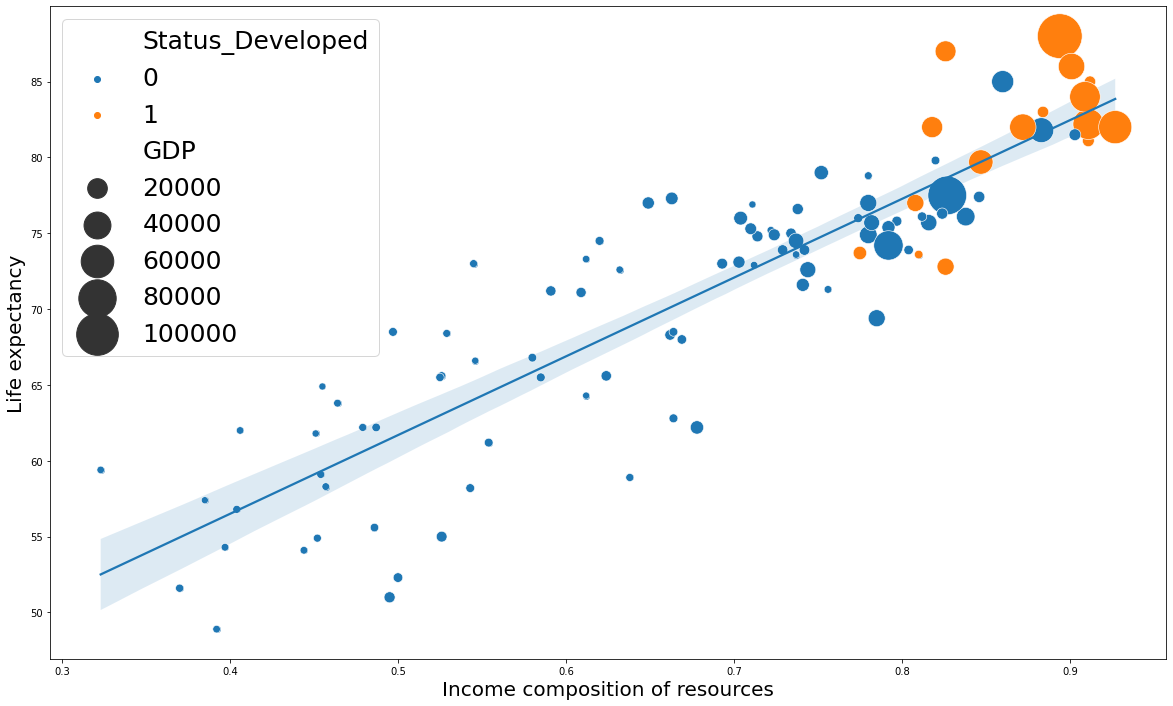

In [16]:
plt.figure(figsize=(20,12))
sns.regplot(x=X_train['Income composition of resources'], y=y_train)
sns.scatterplot(x=X_train['Income composition of resources'], y=y_train, hue=X_train['Status_Developed'], size=X_train['GDP'], sizes=(50,2000))
plt.xlabel('Income composition of resources', fontsize=20)
plt.ylabel('Life expectancy', fontsize=20)
plt.legend(fontsize=25)
plt.show()

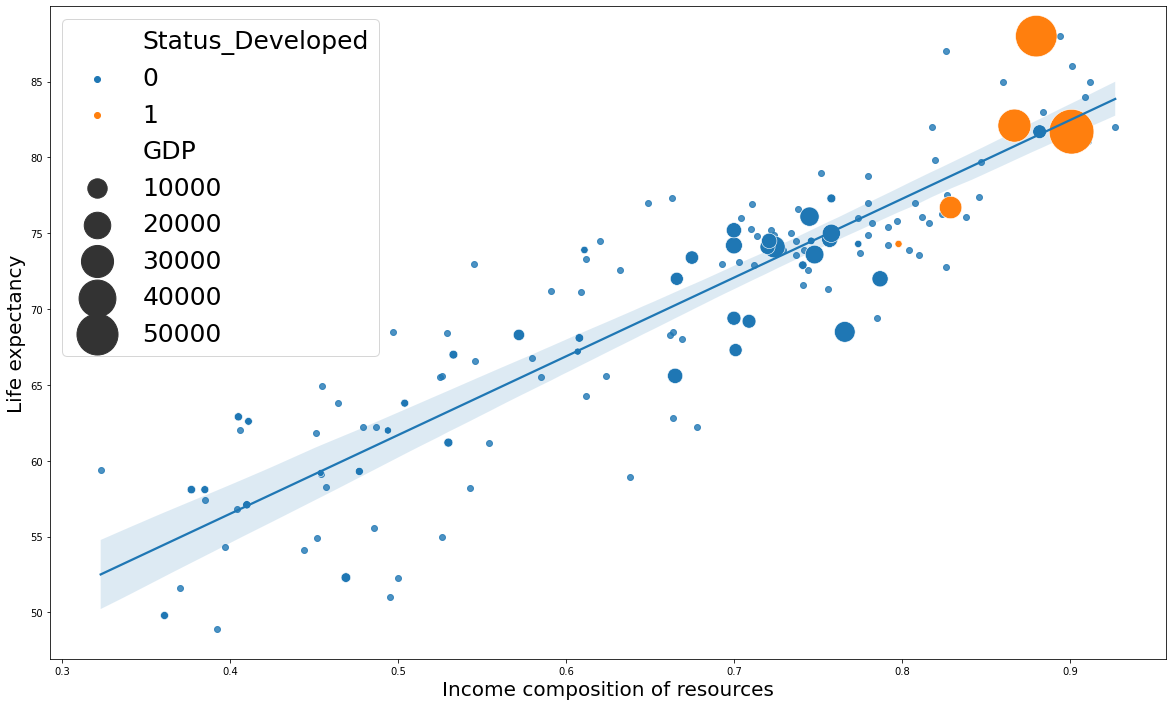

In [17]:
plt.figure(figsize=(20,12))
sns.regplot(x=X_train['Income composition of resources'], y=y_train)
sns.scatterplot(x=X_test['Income composition of resources'], y=y_test, hue=X_test['Status_Developed'], size=X_test['GDP'], sizes=(50,2000))
plt.xlabel('Income composition of resources', fontsize=20)
plt.ylabel('Life expectancy', fontsize=20)
plt.legend(fontsize=25)
plt.show()